In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB



In [2]:
train = pd.read_csv('fashion-mnist_train.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('fashion-mnist_test.csv')

In [5]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### the labels:

0 =	T-shirt/top

1 =	Trouser

2 =	Pullover

3 =	Dress

4 =	Coat

5 =	Sandal

6 =	Shirt

7 =	Sneaker

8 =	Bag

9 =	Ankle boot



In [6]:

class_table = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

#  From number to Item of fashion:

def get_label_cls(label):
    return class_table[label]

get_label_cls(3)

'Dress'

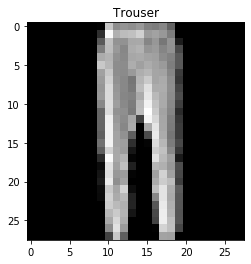

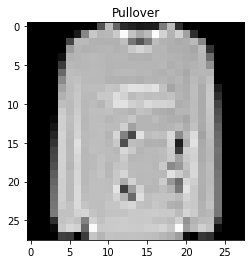

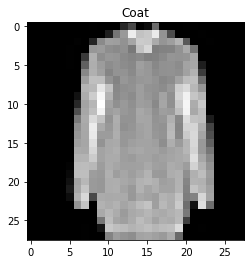

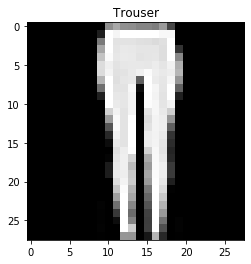

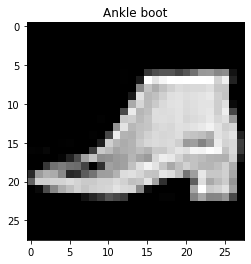

In [7]:
# Example of the pictures

for i in range(5000,5005): 
    sample = np.reshape(test[test.columns[1:]].iloc[i].values, (28,28))
    plt.figure()
    plt.title(get_label_cls(test["label"].iloc[i]))
    plt.imshow(sample, 'gray')

In [8]:
X_train = train.drop('label',axis=1)
y_train = train['label']
X_test = test.drop('label',axis=1)
y_test = test['label']

In [9]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA


lets try diffrent options in PCA,  and find the optimle option by comparison Random-Forest's score in each option:

#### 300 pixels:

In [10]:
pca1 = PCA(n_components=300)
pca1.fit(X_train)
pca_x_train = pca1.transform(X_train)
pca_x_test = pca1.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df1 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df1 = pd.DataFrame(data = pca_x_test)/255

In [11]:
rf = RandomForestClassifier(n_estimators=100)
score_rf1 = cross_val_score(rf, pca_x_train_df1, y_train, cv=5)
print (score_rf1.mean())

0.8573666666666668


#### 196 pixels:

In [12]:
pca2 = PCA(n_components=196)
pca2.fit(X_train)
pca_x_train = pca2.transform(X_train)
pca_x_test = pca2.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df2 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df2 = pd.DataFrame(data = pca_x_test)/255

In [13]:
rf = RandomForestClassifier(n_estimators=100)
score_rf2 = cross_val_score(rf, pca_x_train_df2, y_train, cv=5)
print (score_rf2.mean())

0.8619999999999999


#### 100 pixels:

In [14]:
pca3 = PCA(n_components=100)
pca3.fit(X_train)
pca_x_train = pca3.transform(X_train)
pca_x_test = pca3.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df3 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df3 = pd.DataFrame(data = pca_x_test)/255

In [15]:
rf = RandomForestClassifier(n_estimators=100)
score_rf3 = cross_val_score(rf, pca_x_train_df3, y_train, cv=5)
print (score_rf3.mean())

0.8662166666666666


#### 50 pixels:

In [16]:
pca4 = PCA(n_components=50)
pca4.fit(X_train)
pca_x_train = pca4.transform(X_train)
pca_x_test = pca4.transform(X_test)

# From array to Data Frame  &  Normalizing the features:
pca_x_train_df4 = pd.DataFrame(data = pca_x_train)/255
pca_x_test_df4 = pd.DataFrame(data = pca_x_test)/255

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
score_rf4 = cross_val_score(rf, pca_x_train_df4, y_train, cv=5)
print (score_rf4.mean())

In [ ]:
score = [score_rf1.mean(), score_rf2.mean(), score_rf3.mean(), score_rf4.mean()]
score_by_pixel = pd.DataFrame ( data= score, index = ['300 pixels', '196 pixels', '100 pixels', '50 pixels'] )
score_by_pixel

#### --->  the optimal option is:   n_components= 100 (pca3)

In [36]:
#pca_x_train_df3.head()

## Models  &  Cross-Validation

#### Random Forest

In [37]:
rf = RandomForestClassifier(n_estimators=100)
score_rf = cross_val_score(rf, pca_x_train_df4, y_train, cv=5)
print ("Random Forest's score:  ", score_rf.mean())

0.8659833333333333


#### AdaBoost

In [44]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
score_abc = cross_val_score(abc, pca_x_train_df4, y_train, cv=5)
print ("AdaBoost's score:  ", score_abc.mean())

0.5291166666666667


#### Decision Tree

In [38]:
from sklearn import tree
score_dt_by_i = []

for i in range (5,25):
    dt = tree.DecisionTreeClassifier(random_state=7, max_depth=i)
    score_dt = cross_val_score(dt, pca_x_train_df4, y_train, cv=5)
    score_dt_by_i.append(score_dt.mean())

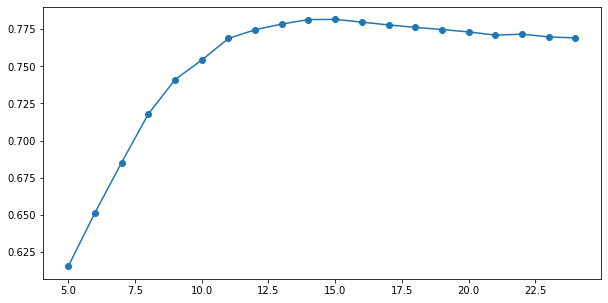

In [57]:
plt.figure(figsize=(10,5))    
plt.plot(range(5,25), score_dt_by_i, marker='o')

--->  the optimal depth is 15:

In [43]:
dt = tree.DecisionTreeClassifier(random_state=7, max_depth=15)
score_dt = cross_val_score(dt, pca_x_train_df4, y_train, cv=5)
print ("Decision Tree's score: ", score_dt.mean())

0.7816


#### Knn

In [48]:
#find the optimal K:

score_knn_by_i = []

for i in range (2,9):
    knn = KNeighborsClassifier(n_neighbors=i)
    score_knn = cross_val_score(knn, pca_x_train_df4, y_train, cv=5)
    score_knn_by_i.append(score_dt.mean())


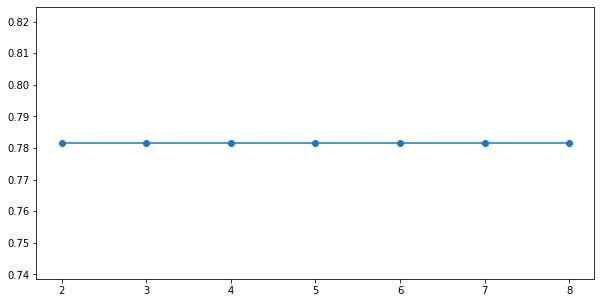

In [56]:
plt.figure(figsize=(10,5))    
plt.plot(range(2,9), score_knn_by_i, marker='o')

--->  the score is the same so we take randomly k=2

In [58]:
knn = KNeighborsClassifier(n_neighbors=2)
score_knn = cross_val_score(knn, pca_x_train_df4, y_train, cv=5)
print ("knn's score: ", score_knn.mean())

knn's score:  0.8407


#### Naive Bayes

In [47]:
nb = GaussianNB()
score_nb = cross_val_score(nb, pca_x_train_df4, y_train, cv=5)
print (score_nb.mean())

0.7757833333333334


In [59]:
all_score = pd.DataFrame ( data= [score_rf.mean(), score_abc.mean(), score_dt.mean(), score_knn.mean(), score_nb.mean()],
                          index = ['Random Forest', 'AdaBoost', 'Decision Tree', 'knn', 'Naive Bayes' ] )

In [60]:
all_score

,0
Random Forest,0.865983
AdaBoost,0.529117
Decision Tree,0.781600
knn,0.840700
Naive Bayes,0.775783
